# Latent Dirichlet allocation (LDA) in WebPPL

In [1]:
import os
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from matplotlib import font_manager
from matplotlib import cm
avenir = "visuals/Avenir.ttf"

## Distributions of words in each topic

In [2]:
from wordcloud import WordCloud

In [3]:
df = pd.read_csv("lda/lda_example_5docs_10000samp_100burn_5lag_wordDistForTopic.csv", index_col=0, header=None)
df.head()

,1,2
0,,
auditory,0.033727,0.613730
hearing,0.014571,0.363179
language,0.508210,0.021660
speech,0.443492,0.001431


TOPIC 1


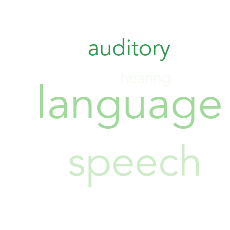

TOPIC 2


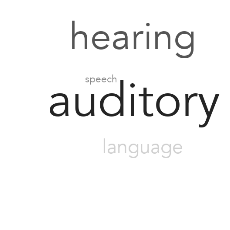

In [8]:
cms = [cm.Greens, cm.Greys]
for i in range(1,len(df.columns)+1):
    print("TOPIC {}".format(i))
    vals = [int(val*100) for val in df[i]]
    words = {word: vals[j] for j, word in enumerate(df.index)}
    wordcloud = WordCloud(width=450, height=450,
                          prefer_horizontal=1,
                          max_words=len(df),
                          background_color="white", 
                          font_path=avenir,
                          colormap=cms[i-1],
                          min_font_size=12).generate_from_frequencies(words)                     
    plt.figure(figsize=(3, 3), facecolor=None) 
    plt.imshow(wordcloud) 
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.savefig("visuals/example_wordsByTopic_{}.png".format(i), bbox_inches="tight", dpi=250)
    plt.show() 

## Distribution of topics in each document

In [23]:
df = pd.read_csv("lda/lda_example_5docs_10000samp_100burn_5lag_topicDistForDoc.csv", index_col=None, header=None)
df

,0,1
0,0.127157,0.872843
1,0.999891,0.000109
2,0.000460,0.999540
3,0.988251,0.011749
4,0.021479,0.978521


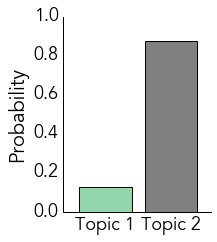

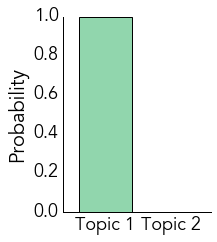

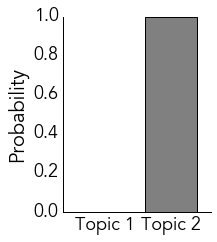

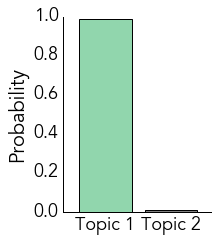

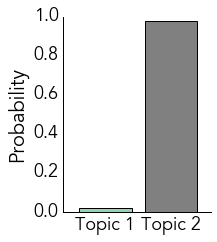

In [40]:
# Iterate over documents
for i in range(len(df)):

    # Plot data
    fig = plt.figure(figsize=[2.65, 3.5])
    plt.bar([0,1], df.loc[i], color=["#91d6ad", "gray"])

    # Style
    font_labels = font_manager.FontProperties(fname=avenir, size=20)
    font_ticks = font_manager.FontProperties(fname=avenir, size=18)
    plt.ylabel("Probability", fontproperties=font_labels)
    plt.xticks(fontproperties=font_ticks)
    plt.yticks(fontproperties=font_ticks)
    plt.xlim([-0.25,2])
    plt.ylim([0,1])
    ax = plt.subplot(111)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.set_xticks([0.4,1.4])
    ax.set_xticklabels(("Topic 1", "Topic 2"))
    plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False) 

    # Export
    plt.savefig("visuals/example_topicsbyDoc_{}.png".format(i), bbox_inches="tight", dpi=250)
    plt.show()

## Perplexity over the number of MH samples

In [42]:
df = pd.read_csv("lda/lda_example_perplexity.csv", index_col=None, header=None)
df.columns = ["SAMPLES", "PERPLEXITY"]
df.head()

,SAMPLES,PERPLEXITY
0,1,7.063481
1,5,5.800444
2,10,5.648491
3,50,4.866228
4,100,4.129520


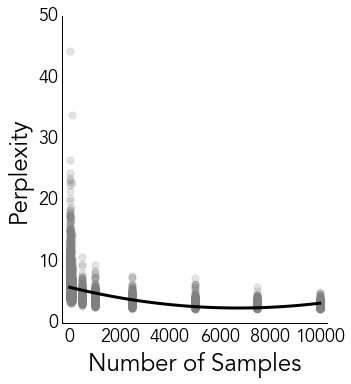

In [47]:
# Plot data
fig = plt.figure(figsize=[4.75, 5.5])
plt.scatter(df["SAMPLES"], df["PERPLEXITY"], color="gray", alpha=0.2, s=50)

# Fit curve
z = np.polyfit(df["SAMPLES"], df["PERPLEXITY"], 2)
f = np.poly1d(z)
x_new = np.linspace(df["SAMPLES"][0], list(df["SAMPLES"])[-1], 50)
y_new = f(x_new)
plt.plot(x_new, y_new, color="k", linewidth=3)

# Style
font_labels = font_manager.FontProperties(fname=avenir, size=24)
font_ticks = font_manager.FontProperties(fname=avenir, size=18)
plt.xlabel("Number of Samples", fontproperties=font_labels)
plt.ylabel("Perplexity", fontproperties=font_labels)
plt.xticks(fontproperties=font_ticks)
plt.yticks(fontproperties=font_ticks)
plt.xlim([-300,10300])
ax = plt.subplot(111)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False) 

# Export
plt.savefig("visuals/example_perplexity.png", bbox_inches="tight", dpi=250)
plt.show()